In [17]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 26 11:07:42 2018

@author: hassan.naseri
"""

#QX_TOKEN = "728624125ddfb3acc6485060d3c3bbd63e8c0373e65b3e8d1f29fd91417c75f7efa60cccd73f17669da651e24669c8a2865e7c1fcefc01a3879dd5c735003224"
#QX_URL = "https://quantumexperience.ng.bluemix.net/api"
# Authenticate with the IBM Q API in order to use online devices.
# You need the API Token and the QX URL.
#from qiskit import register
#register(QX_TOKEN, QX_URL)

# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import available_backends, execute
from qiskit.tools.visualization import plot_circuit, plot_histogram

# This is only to disable extra warnings/messages
import logging
logging.getLogger("qiskit.tools.visualization").setLevel(logging.ERROR)


In [18]:
# See a list of available backends
print("Available backends: ", available_backends())
# print("Local backends: ", available_backends({'local': True}))

Available backends:  ['local_qasm_simulator', 'local_statevector_simulator', 'local_unitary_simulator']


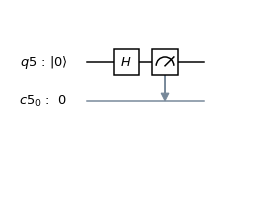

In [19]:
# Create a Quantum Register with 1 qubit. The initial state is |0>
q = QuantumRegister(1)
# Create a Classical Register with 1 bit.
c = ClassicalRegister(1)
# Create a Quantum Circuit
qc = QuantumCircuit(q, c)

# Add Hadamard gate to the qubit, putting it in superposition state.
qc.h(q)

# Add a Measurement gate to see the state.
qc.measure(q, c)

plot_circuit(qc)

In [20]:
# Compile and run the Quantum circuit on a simulator backend
# By default, it will run for 1000 shots
job_sim = execute(qc, "local_qasm_simulator")
# Compile and run the Quantum circuit on IBM Q backend
#job_sim = execute(qc, "ibmqx4")

sim_result = job_sim.result()

# Show the results
print("simulation: ", sim_result)
print(sim_result.get_counts(qc))

simulation:  COMPLETED
{'0': 478, '1': 546}


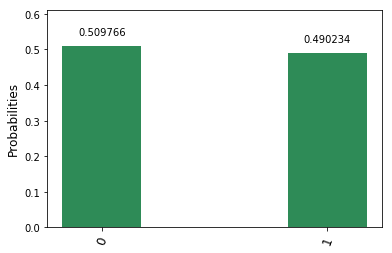

In [13]:
plot_histogram(sim_result.get_counts(qc))